In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
# DATE: quarterly dates spanning from 1977 Q1 to 2023 Q4
# GDP: quarterly %change in real gross domestic product (FRED)
# TNF: quarterly %change in total non farm payrolls (FRED)
# UE: quartely %change in unemployment rate (FRED)
# FFR: quarterly %change in federal fund rate (FRED)
# CPI: quarterly %change in consumer price index (FRED)
# YS: quartely yield spread between 10-year and 2-year U.S. Treasury bonds (FRED)
# SP500: quarterly %change in S&P 500 index (Investing.com)
# CSI: quarterly %change in consumer sentiment index (University of Michigan)
# IP: quarterly %change in industrial production index (FRED)
# HP: quarterly %change in house price index (FRED)
# PCE: quarterly %change in personal consumption expenditure (FRED)
# RECESSION: recessions according to NBER (NBER)

In [3]:
df=pd.read_excel(r"C:\Users\Ryan Matthew\Desktop\SSDI\project\recession_masterdata.xlsx")
dfs=df.copy()
dfs

,DATE,GDP,TNF,UE,FFR,CPI,YS,SP500,CSI,IP,HP,PCE,CCI,BCI,RECESSION
0,1977-01-01,1.186230,1.17219,-5.12821,0.86022,2.05479,1.41,0.020993,0.032438,2.16255,3.39286,2.21213,0.170669,-0.084827,0
1,1977-04-01,1.941924,1.34781,-2.70270,14.92537,1.51007,1.12,-0.054645,0.095341,2.53384,4.57686,2.04312,-0.034076,-0.032028,0
2,1977-07-01,1.803169,1.26564,-5.55556,13.91466,1.32231,0.59,0.004899,0.003956,0.63111,2.32590,2.44539,0.150222,-0.385284,0
3,1977-10-01,0.001990,1.05109,-5.88235,6.84039,1.63132,0.56,-0.051672,-0.031527,0.51848,3.71217,3.20587,0.319089,-0.142616,0
4,1978-01-01,0.319845,1.24393,-1.56250,3.50610,1.76565,0.45,-0.021795,-0.033571,0.98622,3.16431,3.10629,0.199918,0.201632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2022-10-01,0.635424,0.49174,0.00000,60.15625,0.83384,-0.53,-0.056510,0.042517,-1.97386,-0.76063,0.78409,0.136790,-0.737429,0
184,2023-01-01,0.556380,0.59304,0.00000,13.41463,0.98122,-0.58,0.048200,0.117455,1.15722,0.53668,1.88925,0.788454,-0.161006,0
185,2023-04-01,0.511121,0.52897,2.85714,9.24731,0.74865,-1.06,0.018611,-0.014599,-0.34970,3.11022,1.10925,0.633798,-0.135999,0
186,2023-07-01,1.193871,0.41019,5.55556,4.92126,1.08058,-0.44,0.104419,0.102222,0.97478,1.90346,1.65590,0.461014,-0.187934,0


In [5]:
# Finding Correlated Features

In [6]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dfs[['GDP', 'TNF', 'UE', 'FFR', 'CPI', 'YS', 'SP500', 'CSI', 'IP',
       'HP', 'PCE', 'CCI', 'BCI']], 0.80)

print(corr_features)

{'TNF', 'UE'}


In [7]:


def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_df = calculate_vif(dfs[['GDP', 'TNF', 'UE', 'FFR', 'CPI', 'YS', 'SP500', 'CSI', 'IP','HP', 'PCE', 'CCI', 'BCI']])

print(vif_df)

   Feature        VIF
0      GDP   5.318513
1      TNF  11.334183
2       UE   7.022572
3      FFR   1.363963
4      CPI   3.352794
5       YS   1.366550
6    SP500   1.528615
7      CSI   1.917607
8       IP   2.913562
9       HP   2.405670
10     PCE   4.635048
11     CCI   3.011216
12     BCI   2.559463


In [8]:
vif_df2 = calculate_vif(dfs[['GDP', 'UE', 'FFR', 'CPI', 'YS', 'SP500', 'CSI', 'IP','HP', 'PCE', 'CCI', 'BCI']])
print(vif_df2)

   Feature       VIF
0      GDP  4.414208
1       UE  2.763923
2      FFR  1.361915
3      CPI  3.124893
4       YS  1.365888
5    SP500  1.528503
6      CSI  1.911608
7       IP  2.803481
8       HP  2.262759
9      PCE  4.630169
10     CCI  2.989802
11     BCI  2.461309


In [9]:
# Visualizing Trends 

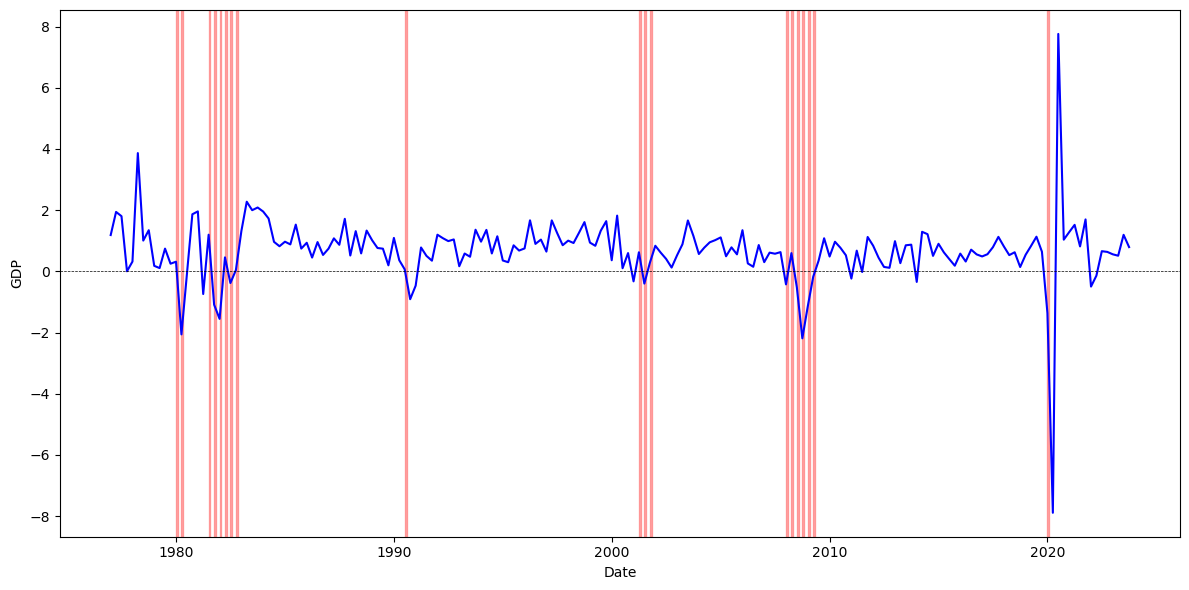

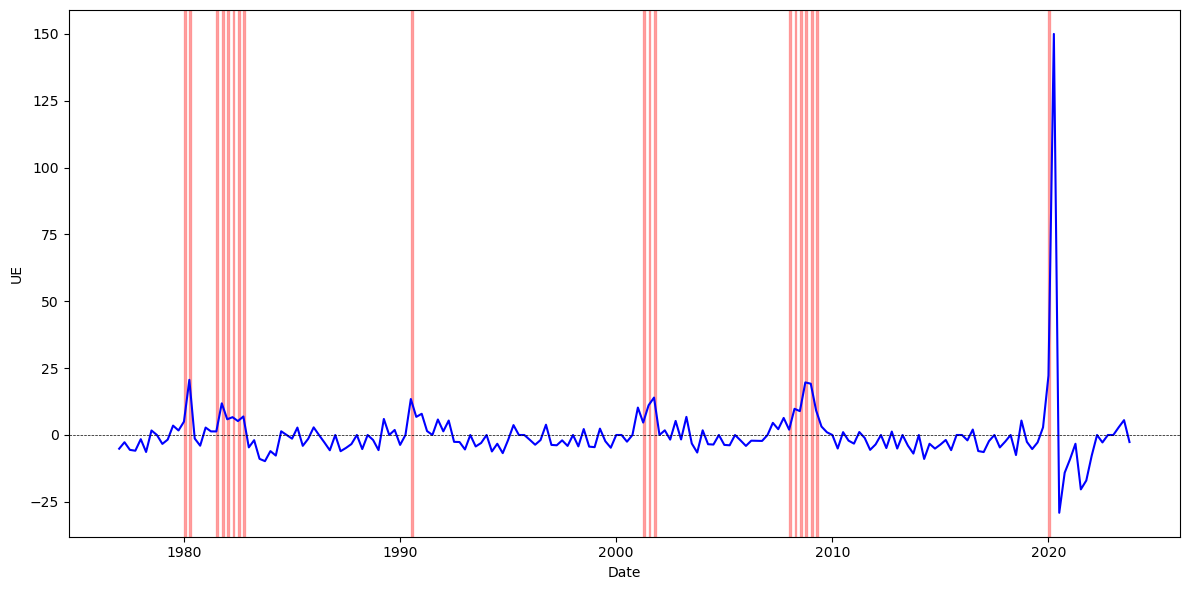

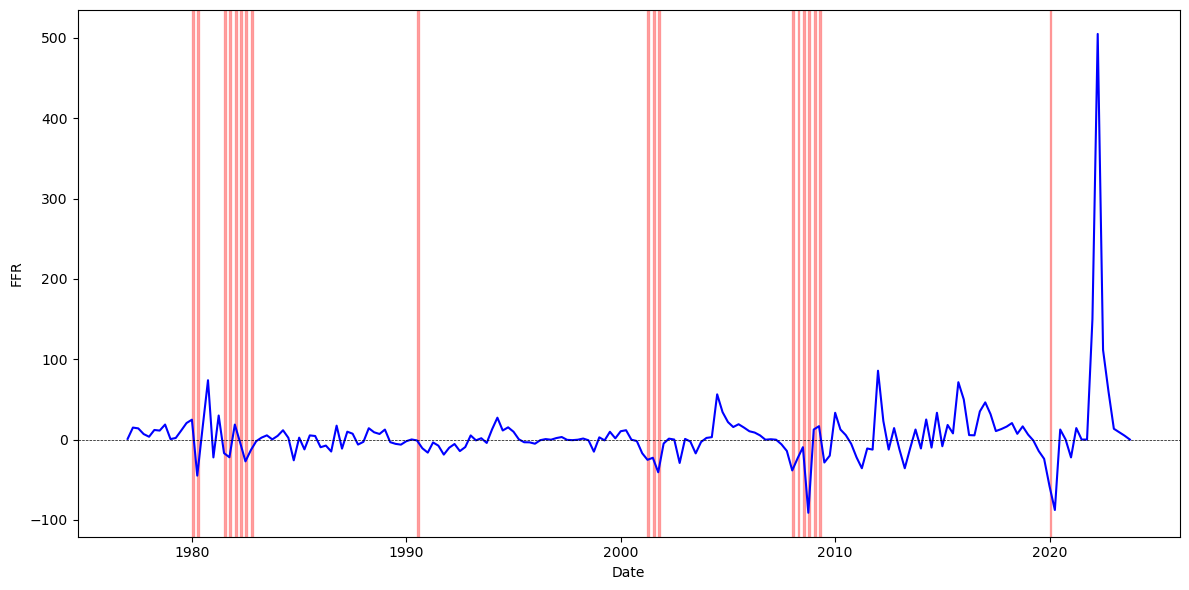

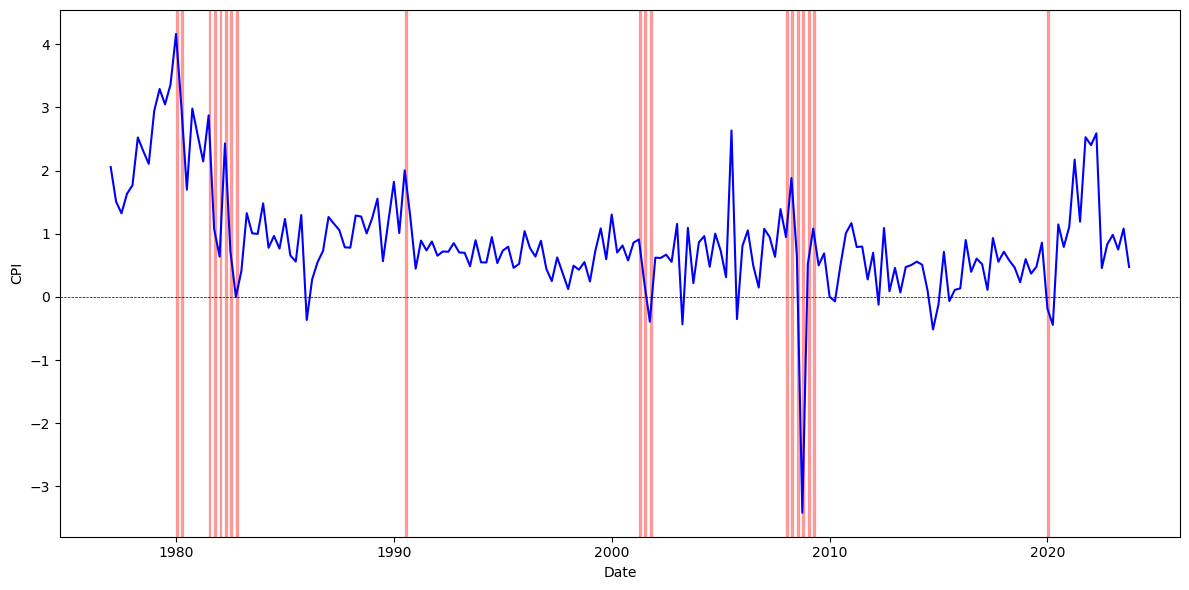

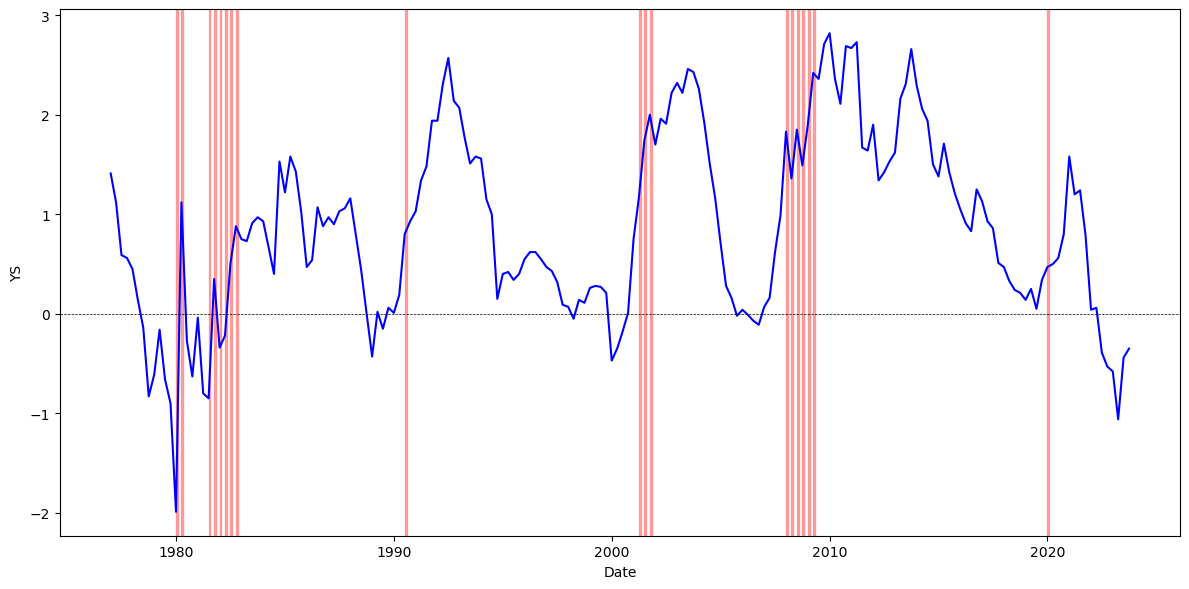

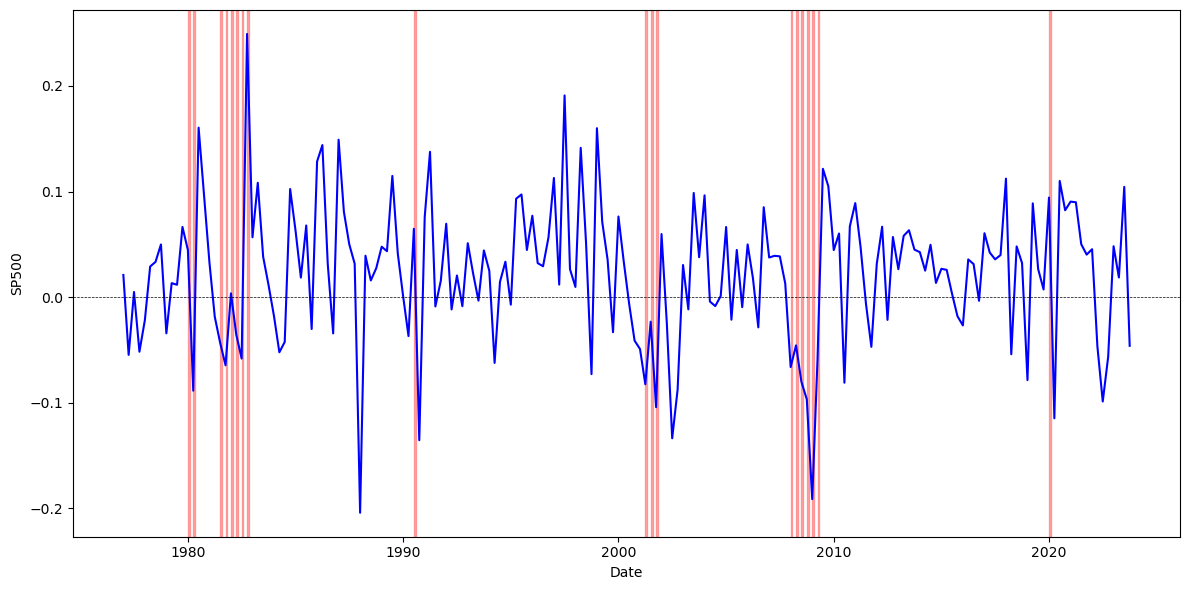

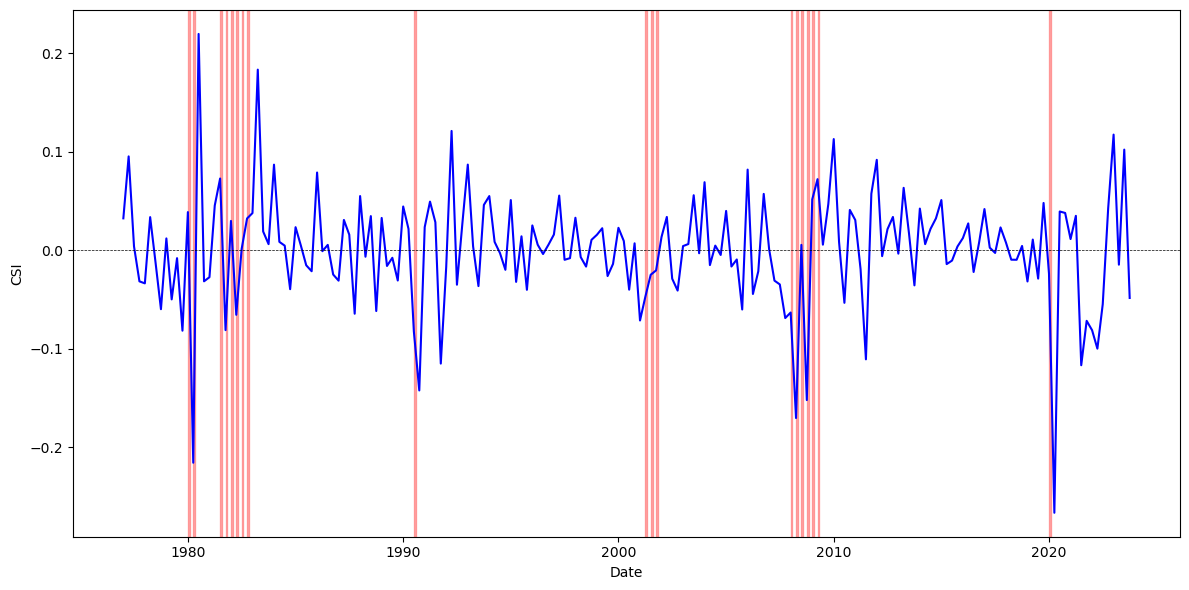

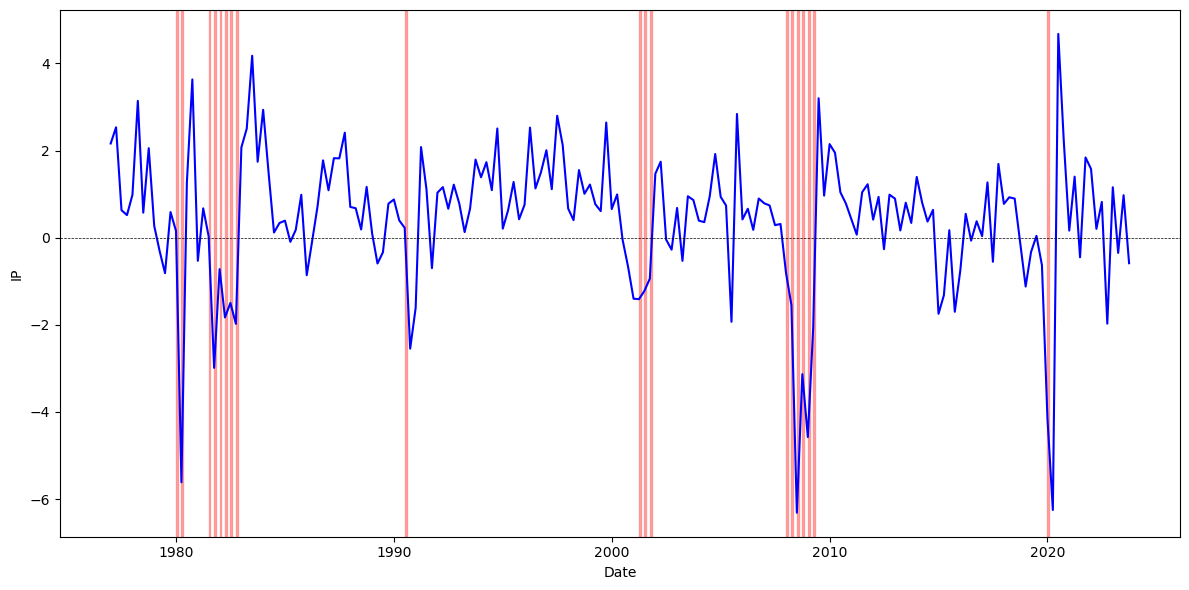

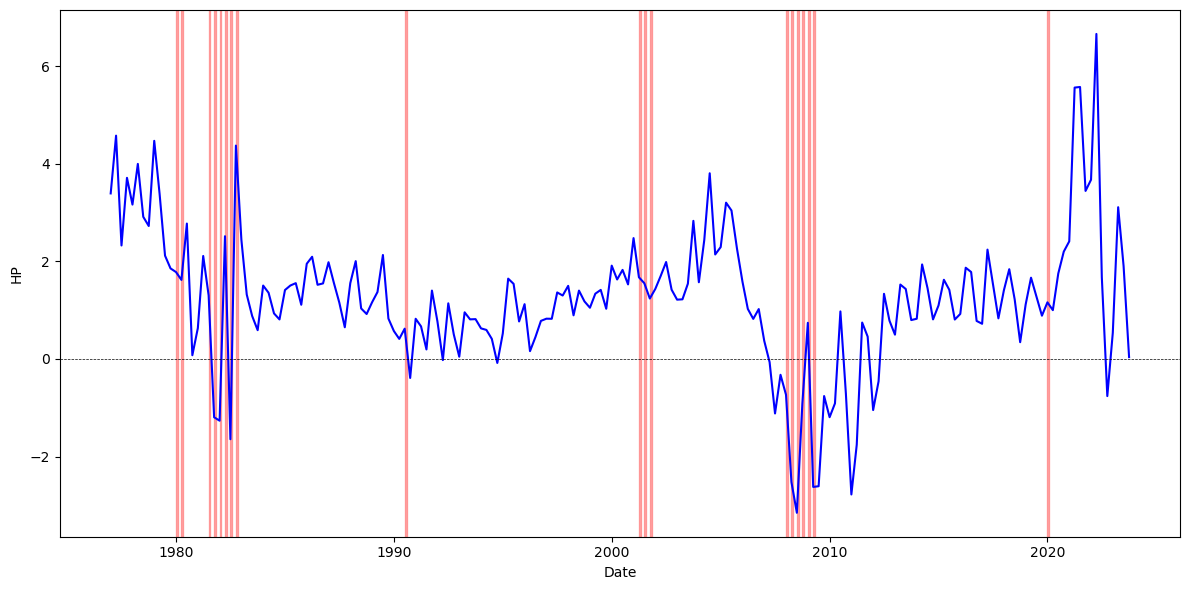

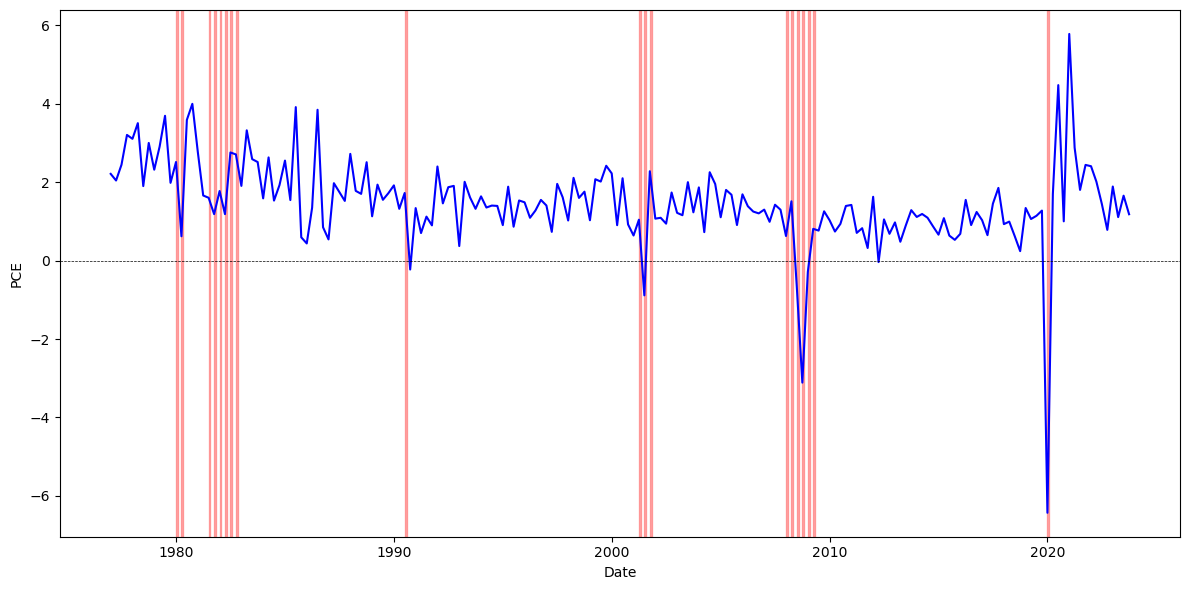

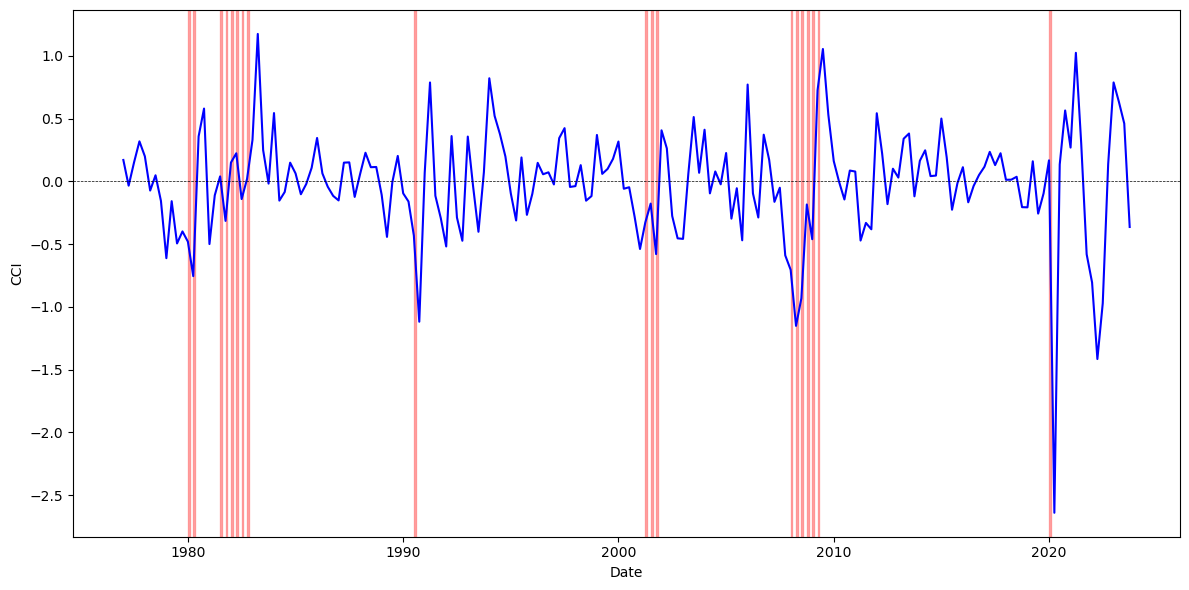

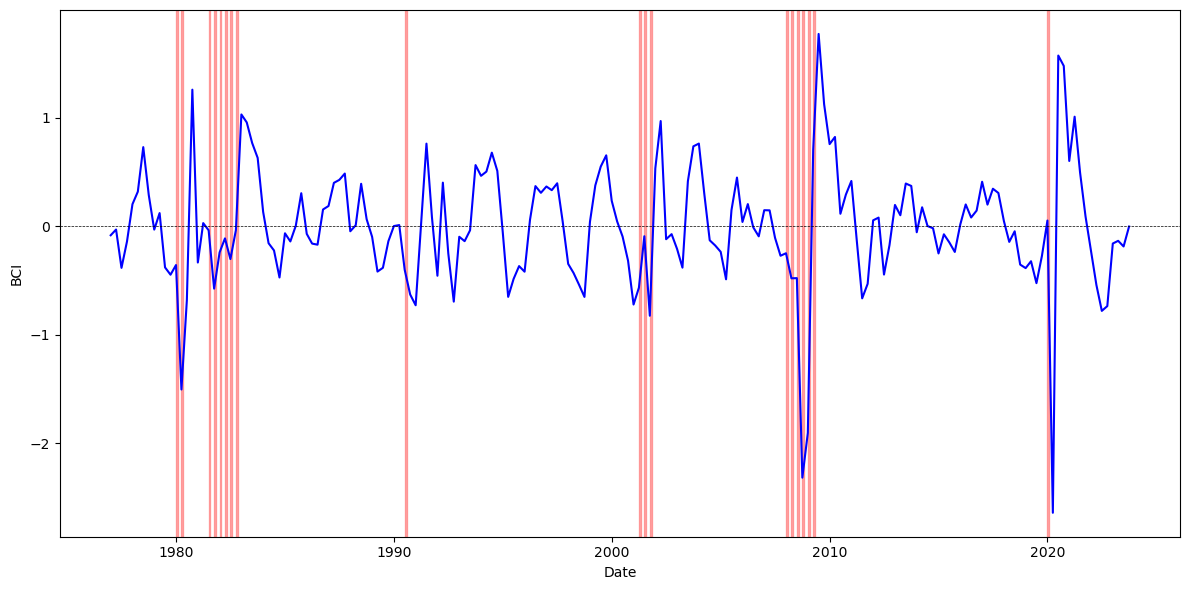

In [10]:
df_recession = dfs[dfs['RECESSION'] == 1]
variables = ['GDP', 'UE', 'FFR', 'CPI', 'YS', 'SP500', 'CSI', 'IP','HP', 'PCE', 'CCI', 'BCI']

for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dfs, x='DATE', y=variable, color='blue')
    for recession_date in df_recession['DATE']:
        plt.axvspan(recession_date, recession_date + pd.DateOffset(months=1), color='red', alpha=0.3)
    
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks()
    
    plt.tight_layout()
    plt.show()

In [12]:
train=dfs.loc[:123,:]
test=dfs.loc[124:,:]

In [13]:
features = ['GDP', 'UE', 'FFR', 'CPI', 'YS', 'SP500', 'CSI', 'IP','HP', 'PCE', 'CCI', 'BCI']
target = 'RECESSION'

In [15]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

X_train = train[features]
y_train = train[target]
X_test= test[features]
y_test=test[target]

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model: {name}")

    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    print(f"Train Accuracy: {accuracy_train:.4f}")
    print(f"Train Precision: {precision_train:.4f}")
    print(f"Train Recall: {recall_train:.4f}")
    print(f"Train F1 Score: {f1_train:.4f}")
    print()

    
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test Precision: {precision_test:.4f}")
    print(f"Test Recall: {recall_test:.4f}")
    print(f"Test F1 Score: {f1_test:.4f}")
    print()

Model: Logistic Regression
Train Accuracy: 0.9597
Train Precision: 0.8182
Train Recall: 0.7500
Train F1 Score: 0.7826

Test Accuracy: 0.9531
Test Precision: 0.8333
Test Recall: 0.7143
Test F1 Score: 0.7692

Model: Random Forest
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000

Test Accuracy: 0.9688
Test Precision: 0.8571
Test Recall: 0.8571
Test F1 Score: 0.8571

Model: SVM
Train Accuracy: 0.9194
Train Precision: 1.0000
Train Recall: 0.1667
Train F1 Score: 0.2857

Test Accuracy: 0.9062
Test Precision: 1.0000
Test Recall: 0.1429
Test F1 Score: 0.2500

Model: KNN
Train Accuracy: 0.9274
Train Precision: 1.0000
Train Recall: 0.2500
Train F1 Score: 0.4000

Test Accuracy: 0.9219
Test Precision: 0.6667
Test Recall: 0.5714
Test F1 Score: 0.6154

Model: Naive Bayes
Train Accuracy: 0.9355
Train Precision: 0.6111
Train Recall: 0.9167
Train F1 Score: 0.7333

Test Accuracy: 0.8750
Test Precision: 0.4667
Test Recall: 1.0000
Test F1 Score: 0.6364

Model: Deci

In [17]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=5,random_state=1),
}

X_train = train[features]
y_train = train[target]
X_test= test[features]
y_test=test[target]

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model: {name}")

    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    print(f"Train Accuracy: {accuracy_train:.4f}")
    print(f"Train Precision: {precision_train:.4f}")
    print(f"Train Recall: {recall_train:.4f}")
    print(f"Train F1 Score: {f1_train:.4f}")
    print()

    
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test Precision: {precision_test:.4f}")
    print(f"Test Recall: {recall_test:.4f}")
    print(f"Test F1 Score: {f1_test:.4f}")
    print()


Model: Random Forest
Train Accuracy: 0.9758
Train Precision: 0.9091
Train Recall: 0.8333
Train F1 Score: 0.8696

Test Accuracy: 0.9688
Test Precision: 0.7778
Test Recall: 1.0000
Test F1 Score: 0.8750



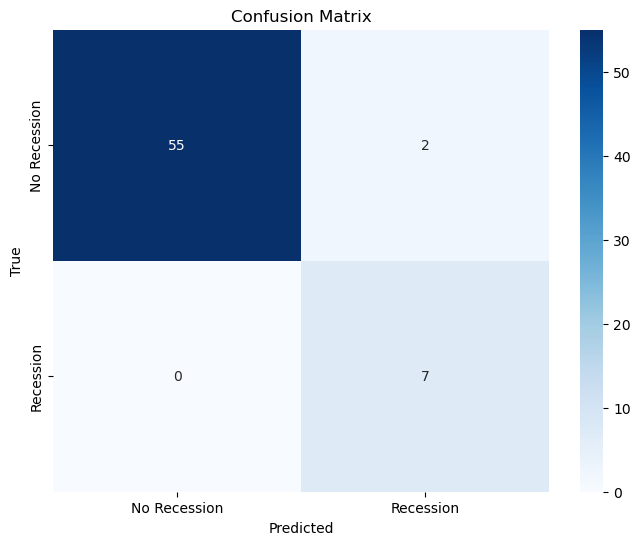

In [19]:
model = RandomForestClassifier(n_estimators=5,random_state=1)

X_train = train[features]
y_train = train[target]
X_test= test[features]
y_test=test[target]

model.fit(X_train, y_train)

y_pred_train = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

classes = ['No Recession', 'Recession']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

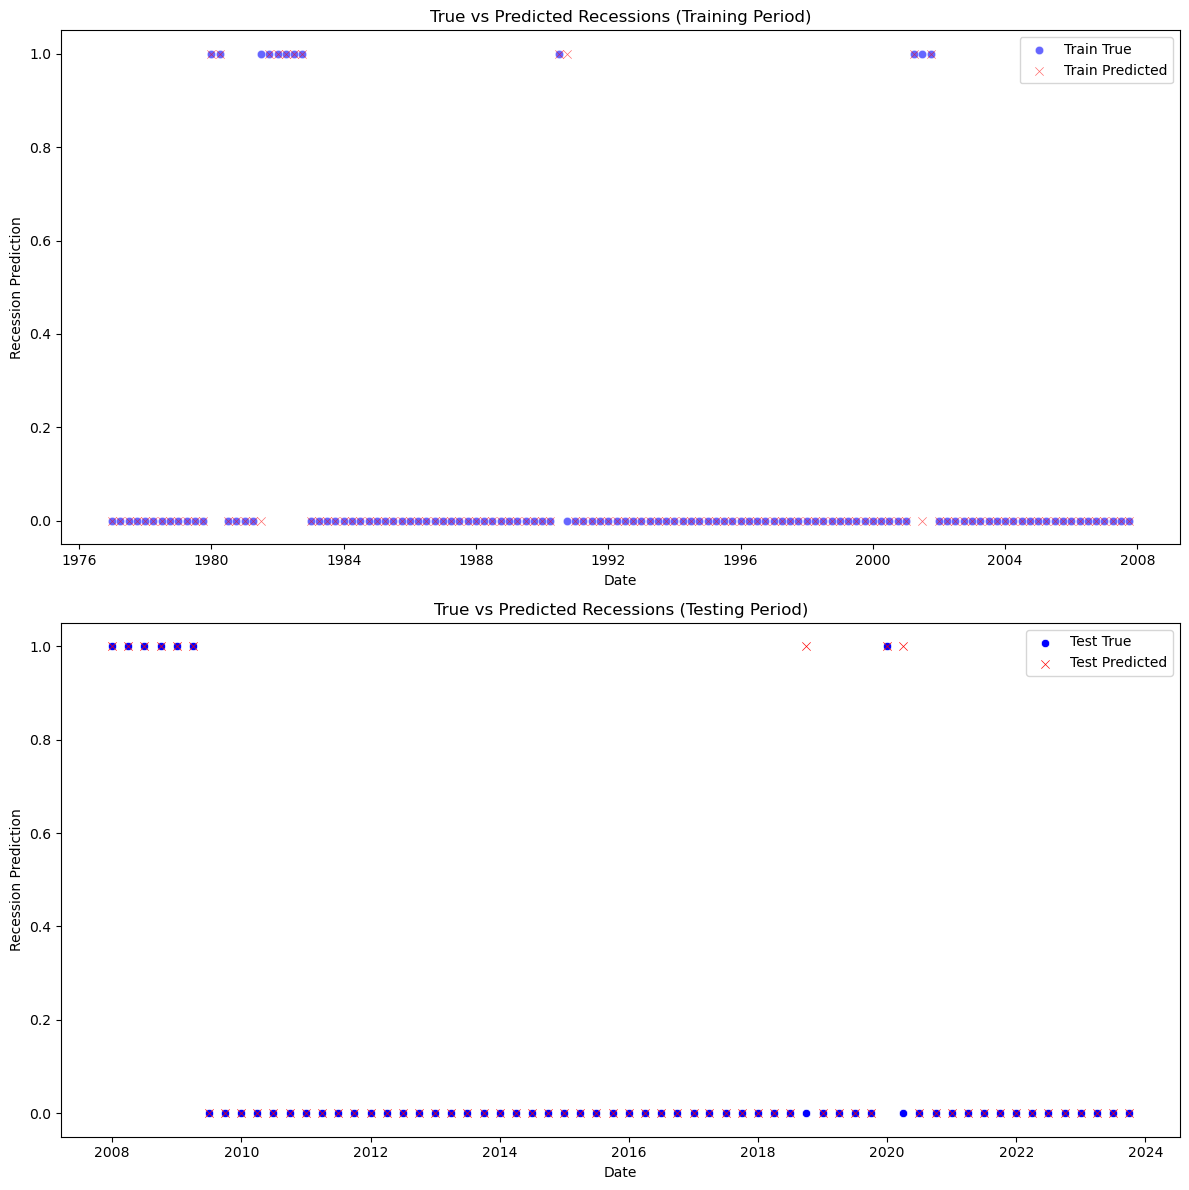

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot for training data
sns.scatterplot(x=train['DATE'], y=y_train, label='Train True', marker='o', color='blue', ax=axs[0], alpha=0.6)
sns.scatterplot(x=train['DATE'], y=model.predict(X_train), label='Train Predicted', marker='x', color='red', ax=axs[0], alpha=0.6)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Recession Prediction')
axs[0].set_title('True vs Predicted Recessions (Training Period)')
axs[0].legend()

# Plot for testing data
sns.scatterplot(x=test['DATE'], y=y_test, label='Test True', marker='o', color='blue', ax=axs[1])
sns.scatterplot(x=test['DATE'], y=y_pred, label='Test Predicted', marker='x', color='red', ax=axs[1])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Recession Prediction')
axs[1].set_title('True vs Predicted Recessions (Testing Period)')
axs[1].legend()

plt.tight_layout()
plt.show()

